# Séance 1: Analyse exploratoire des données desequilibrées


Jessica Fornetti (AMSD)

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Credit Fraud

In [23]:
df = pd.read_csv('creditcard.csv')
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [24]:
df.shape

(284807, 31)

On a un dataset content 284807 lignes et 31 colones

In [25]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Il n'y a pas de valeurs manquantes

In [26]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Il n'y a pas d'attributs constants

Notre variable target est la variable Class



In [78]:
print('No Fraud', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Fraud', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Fraud 99.83 % of the dataset
Fraud 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

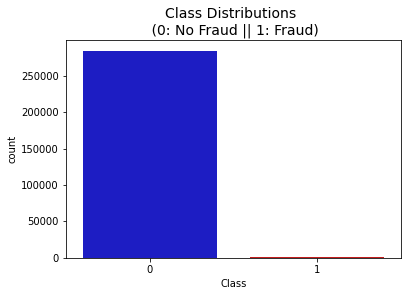

In [79]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x=df["Class"], palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

On voit que le dataset contient une majorité de transactions non fraudeuse

Ce dataset n'a pas de variables categorielles,  donc on passe directement aux variables numeriques

On préfère visulaiser avec des boxplots, que un histogramme, afin d'avoir la distribution de la variable en fonction de Fraud et No Fraud dans le même graphique

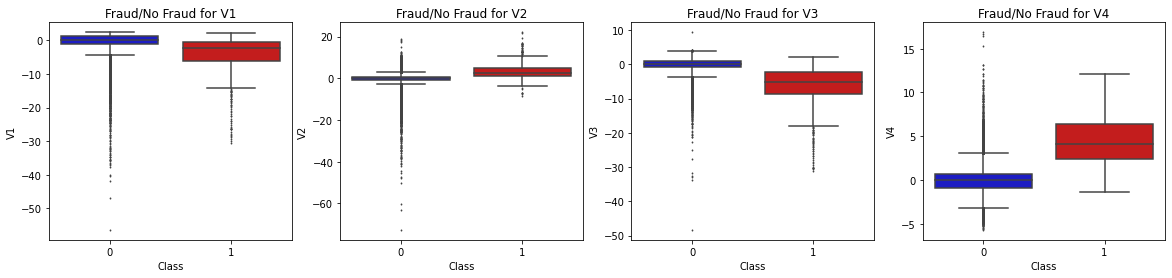

In [92]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V1", data=df, palette=colors, ax=axes[0], fliersize=1)
axes[0].set_title('Fraud/No Fraud for V1')

sns.boxplot(x="Class", y="V2", data=df, palette=colors, ax=axes[1], fliersize=1)
axes[1].set_title('Fraud/No Fraud for V2')


sns.boxplot(x="Class", y="V3", data=df, palette=colors, ax=axes[2], fliersize=1)
axes[2].set_title('Fraud/No Fraud for V3')


sns.boxplot(x="Class", y="V4", data=df, palette=colors, ax=axes[3], fliersize=1)
axes[3].set_title('Fraud/No Fraud for V4')

plt.show()

On remarque que pour les variables V2 et V4 dans le cas de fraude, les valeurs prises par la variable sont plus elevées (que dans le cas de non fraude). V2 et V4 semblent donc positivement corréllées avec notre variable churn Class.

A l'inverse, on remarque que les variables V1 et V3 semblent negativement corréllées avec notre variable churn Class, car dans le cas de fraude, les valeurs prises par la variable sont plus bases (que dans le cas de non fraude).

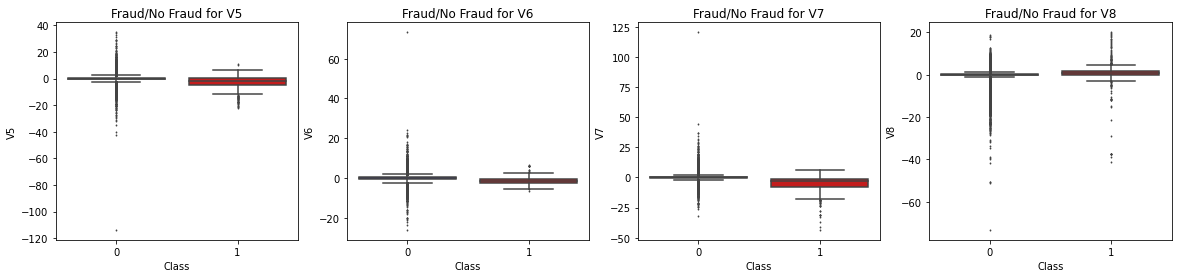

In [93]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V5", data=df, palette=colors, ax=axes[0], fliersize=1)
axes[0].set_title('Fraud/No Fraud for V5')

sns.boxplot(x="Class", y="V6", data=df, palette=colors, ax=axes[1], fliersize=1)
axes[1].set_title('Fraud/No Fraud for V6')


sns.boxplot(x="Class", y="V7", data=df, palette=colors, ax=axes[2], fliersize=1)
axes[2].set_title('Fraud/No Fraud for V7')


sns.boxplot(x="Class", y="V8", data=df, palette=colors, ax=axes[3], fliersize=1)
axes[3].set_title('Fraud/No Fraud for V8')

plt.show()

Pour les variables V5, V6, V7 et V8, les distributions des variables dans le cas fraude et non fraude sont similaires: on voit que les medianes sont tres proche l'une de l'autre.

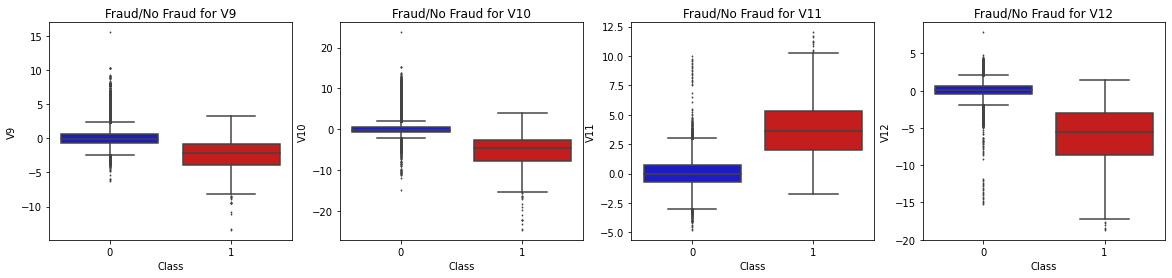

In [94]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V9", data=df, palette=colors, ax=axes[0], fliersize=1)
axes[0].set_title('Fraud/No Fraud for V9')

sns.boxplot(x="Class", y="V10", data=df, palette=colors, ax=axes[1], fliersize=1)
axes[1].set_title('Fraud/No Fraud for V10')


sns.boxplot(x="Class", y="V11", data=df, palette=colors, ax=axes[2], fliersize=1)
axes[2].set_title('Fraud/No Fraud for V11')


sns.boxplot(x="Class", y="V12", data=df, palette=colors, ax=axes[3], fliersize=1)
axes[3].set_title('Fraud/No Fraud for V12')

plt.show()

Pour les variables V9, V10 et V12 on remarque que dans le cas de fraude, les valeurs prises par la variable sont moins elevées que dans le cas de non fraude. Elles semblent donc negativement corréllées avec notre variable Class. 


A l'inverse, la variable V11 prend des valeurs plus elevées dans le cas de fraude, donc elle semble positivement corréllées avec la variable Class. 

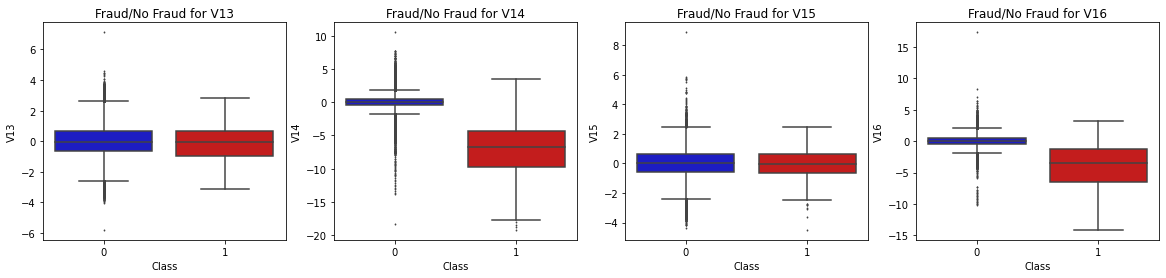

In [95]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V13", data=df, palette=colors, ax=axes[0], fliersize=1)
axes[0].set_title('Fraud/No Fraud for V13')

sns.boxplot(x="Class", y="V14", data=df, palette=colors, ax=axes[1], fliersize=1)
axes[1].set_title('Fraud/No Fraud for V14')


sns.boxplot(x="Class", y="V15", data=df, palette=colors, ax=axes[2], fliersize=1)
axes[2].set_title('Fraud/No Fraud for V15')


sns.boxplot(x="Class", y="V16", data=df, palette=colors, ax=axes[3], fliersize=1)
axes[3].set_title('Fraud/No Fraud for V16')

plt.show()

Pour les variables V13 et V15, les distributions des variables dans le cas fraude et non fraude sont similaires, en effet on voit que les medianes ont l'air égales

Pour les variables V14 et V16, on voit que dans le cas fraude, les valeurs prises par la variables sont plus basses. Elles semblent donc negativement corréllées avec la variable Class.

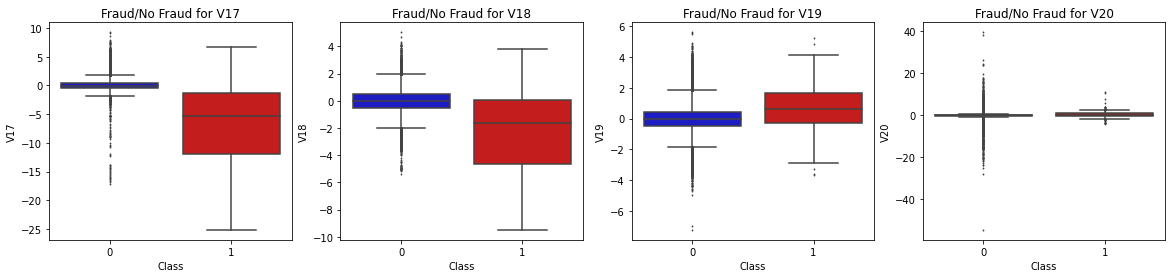

In [96]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=df, palette=colors, ax=axes[0], fliersize=1)
axes[0].set_title('Fraud/No Fraud for V17')

sns.boxplot(x="Class", y="V18", data=df, palette=colors, ax=axes[1], fliersize=1)
axes[1].set_title('Fraud/No Fraud for V18')


sns.boxplot(x="Class", y="V19", data=df, palette=colors, ax=axes[2], fliersize=1)
axes[2].set_title('Fraud/No Fraud for V19')


sns.boxplot(x="Class", y="V20", data=df, palette=colors, ax=axes[3], fliersize=1)
axes[3].set_title('Fraud/No Fraud for V20')

plt.show()

Pour les variables V17 et V18, on voit que dans le cas fraude, les valeurs prises par la variables sont moins elevées que dans le cas de non fraude. Ces variables semblent donc negativement corréllées avec la variable Class.

Pour les variables V19 et V20, les distributions des variables dans le cas fraude et non fraude sont assez similaires car on remarque que les medianes assez sont proches.

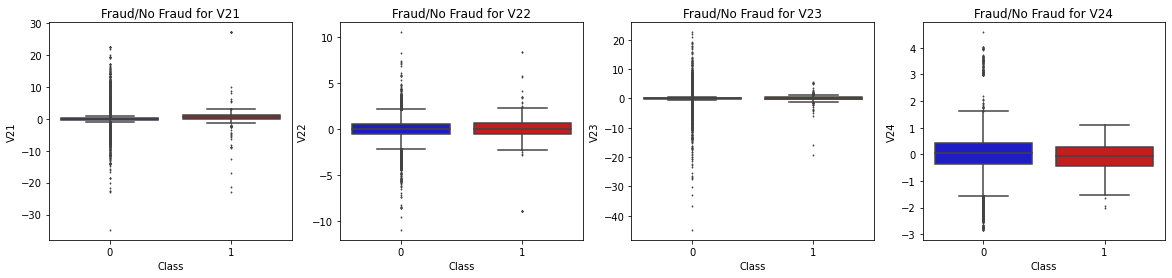

In [97]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V21", data=df, palette=colors, ax=axes[0], fliersize=1)
axes[0].set_title('Fraud/No Fraud for V21')

sns.boxplot(x="Class", y="V22", data=df, palette=colors, ax=axes[1], fliersize=1)
axes[1].set_title('Fraud/No Fraud for V22')


sns.boxplot(x="Class", y="V23", data=df, palette=colors, ax=axes[2], fliersize=1)
axes[2].set_title('Fraud/No Fraud for V23')


sns.boxplot(x="Class", y="V24", data=df, palette=colors, ax=axes[3], fliersize=1)
axes[3].set_title('Fraud/No Fraud for V24')

plt.show()

On voit que pour les variables V21, V22, V23  et V24, les distributions dans le cas fraude et non fraude sont très similaires.

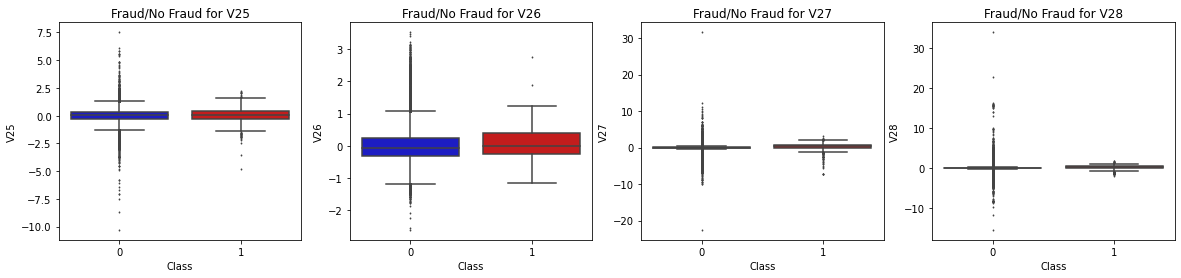

In [98]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V25", data=df, palette=colors, ax=axes[0], fliersize=1)
axes[0].set_title('Fraud/No Fraud for V25')

sns.boxplot(x="Class", y="V26", data=df, palette=colors, ax=axes[1], fliersize=1)
axes[1].set_title('Fraud/No Fraud for V26')


sns.boxplot(x="Class", y="V27", data=df, palette=colors, ax=axes[2], fliersize=1)
axes[2].set_title('Fraud/No Fraud for V27')


sns.boxplot(x="Class", y="V28", data=df, palette=colors, ax=axes[3], fliersize=1)
axes[3].set_title('Fraud/No Fraud for V28')

plt.show()

De même, pour les variables V25, V26, V27  et V28, les distributions dans le cas fraude et non fraude semblent très similaires.

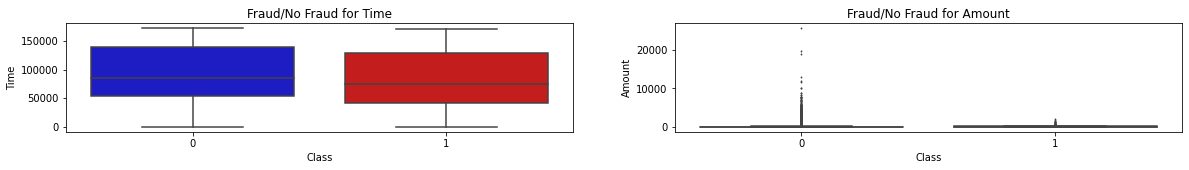

In [99]:
f, axes = plt.subplots(ncols=2, figsize=(20,2))

sns.boxplot(x="Class", y="Time", data=df, palette=colors, ax=axes[0], fliersize=1)
axes[0].set_title('Fraud/No Fraud for Time')

sns.boxplot(x="Class", y="Amount", data=df, palette=colors, ax=axes[1], fliersize=1)
axes[1].set_title('Fraud/No Fraud for Amount')

plt.show()

Similairement, pour les variables Time et Amount, les distributions dans le cas fraude et non fraude sont tres similaires.

Donc pour l'instant les variables qui semblent etre les plus corréllées avec la variable Class sont : V1, V2, V3, V4, V9, V10, V11, V12, V14, V16, V17 et V18

On a la matrice de correlation des attributs :

In [66]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


<Axes: >

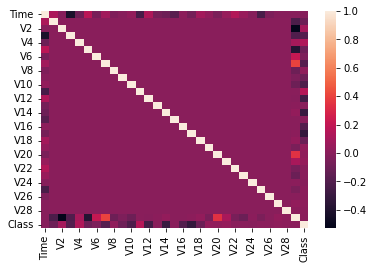

In [67]:
sns.heatmap(df.corr())

Sur le heatmap, on ne voit pas très bien la corrélation entre variables. Mais on peut remarquer que certaines variables comme V18, V17, V16, V14, V12 et V10 sont bien négativement correlées avec la variable Class, alors que V2, V4 et V11 sont positivement correlées. Cela rejoint donc les observations trouvées lors de l'étude exploratoire.

Conclusion :

Les variables qui semblent fortement liées au comportement de fraude sont les suivantes : V2, V4, V10, V11, V12, V14, V16 V17 et V18

## Dataset Bank Marketing

In [44]:
df2 = pd.read_csv('bank-additional-full.csv', sep = ';')
df2


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [45]:
df2.shape

(41188, 21)

On a un dataset content 41188 lignes et 21 colones

In [46]:
df2.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Il n'y a pas de valeurs manquantes

In [47]:
df2.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Il n'y a pas d'attributs constants

On s'interesse à la variable y , si le client souscrit à un depôt à terme ou non

In [48]:
df2['y'] = df2['y'].replace(['no', 'yes'], [0, 1])

df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [50]:
print('Not Subscribe', round(df2['y'].value_counts()[0]/len(df2) * 100,2), '% of the dataset')
print('Subscribe', round(df2['y'].value_counts()[1]/len(df2) * 100,2), '% of the dataset')

Not Subscribe 88.73 % of the dataset
Subscribe 11.27 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: Not Subscribe || 1: Subscribe)')

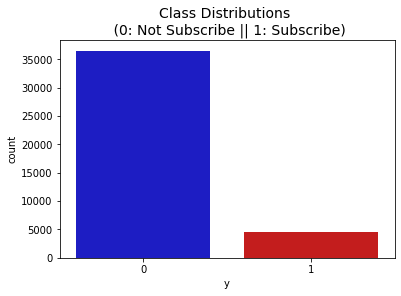

In [51]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x=df2["y"], palette=colors)
plt.title('Class Distributions \n (0: Not Subscribe || 1: Subscribe)', fontsize=14)

On voit que la majorité des individus ne souscrivent pas à un depôt à terme 

On regarde maintenant la proportion de churn
vs. non churn pour les variables categorielles

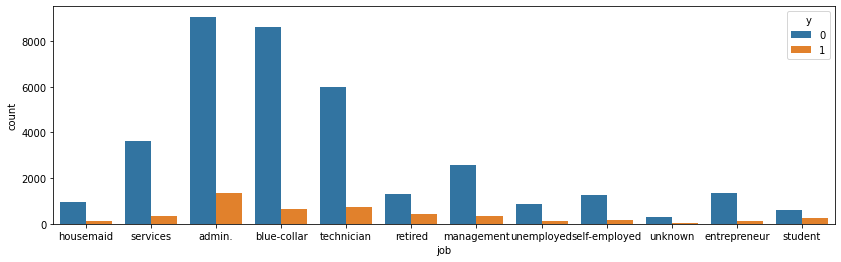

In [109]:
plt.figure(figsize=(14,4))
sns.countplot(data=df2, x="job", hue="y")
plt.show()

<Axes: xlabel='marital', ylabel='count'>

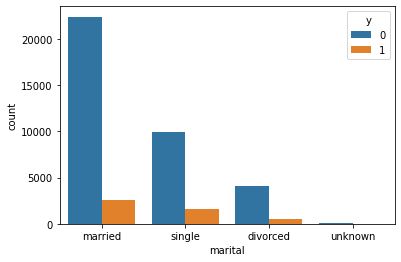

In [106]:
sns.countplot(data=df2, x="marital", hue="y")

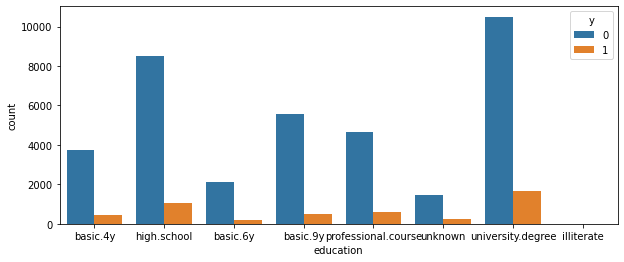

In [112]:
plt.figure(figsize=(10,4))
sns.countplot(data=df2, x="education", hue="y")
plt.show()


<Axes: xlabel='default', ylabel='count'>

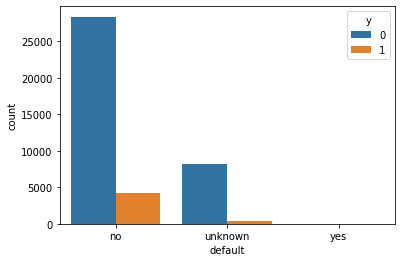

In [113]:
sns.countplot(data=df2, x="default", hue="y")

<Axes: xlabel='housing', ylabel='count'>

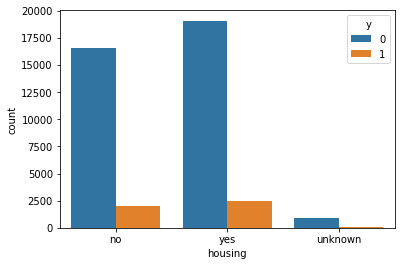

In [114]:
sns.countplot(data=df2, x="housing", hue="y")

<Axes: xlabel='loan', ylabel='count'>

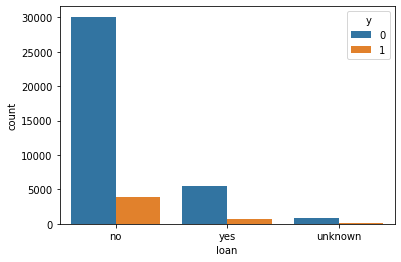

In [115]:
sns.countplot(data=df2, x="loan", hue="y")

<Axes: xlabel='contact', ylabel='count'>

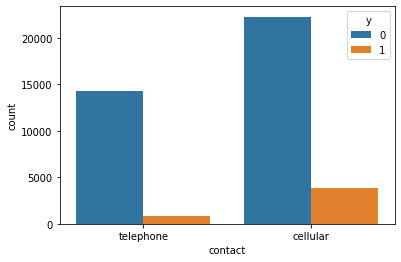

In [116]:
sns.countplot(data=df2, x="contact", hue="y")

<Axes: xlabel='month', ylabel='count'>

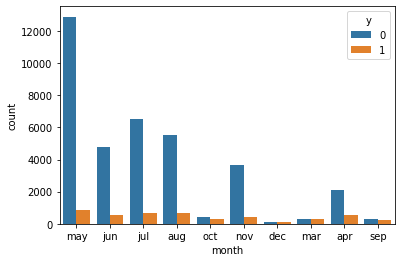

In [117]:
sns.countplot(data=df2, x="month", hue="y")

<Axes: xlabel='day_of_week', ylabel='count'>

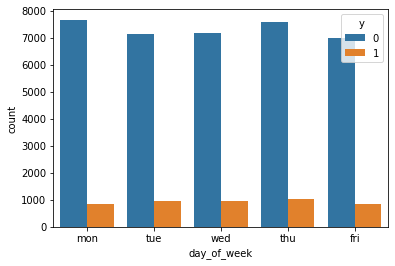

In [118]:
sns.countplot(data=df2, x="day_of_week", hue="y")

<Axes: xlabel='poutcome', ylabel='count'>

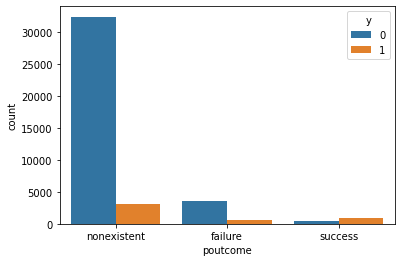

In [119]:
sns.countplot(data=df2, x="poutcome", hue="y")

On regarde maintenant la proportion de churn vs. non churn pour les variables numériques

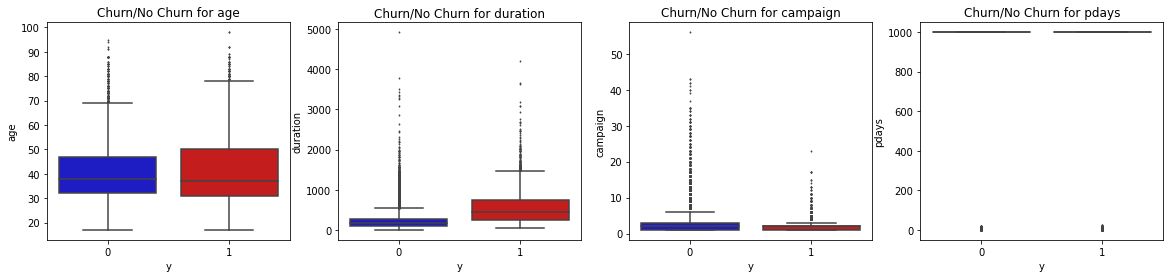

In [120]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="y", y="age", data=df2, palette=colors, ax=axes[0], fliersize=1)
axes[0].set_title('Churn/No Churn for age')

sns.boxplot(x="y", y="duration", data=df2, palette=colors, ax=axes[1], fliersize=1)
axes[1].set_title('Churn/No Churn for duration')


sns.boxplot(x="y", y="campaign", data=df2, palette=colors, ax=axes[2], fliersize=1)
axes[2].set_title('Churn/No Churn for campaign')


sns.boxplot(x="y", y="pdays", data=df2, palette=colors, ax=axes[3], fliersize=1)
axes[3].set_title('Churn/No Churn for pdays')

plt.show()

Pour la variable duration, on voit que dans le cas churn, les valeurs prises par la variables sont plus elevées que dans le cas de non churn. Elle semble donc positivement corréllée avec la variable y.

Pour les variables age, campaign et pdays les distributions des variables dans le cas churn et non churn sont très similaires, en effet on voit que les médianes ont l'air égales

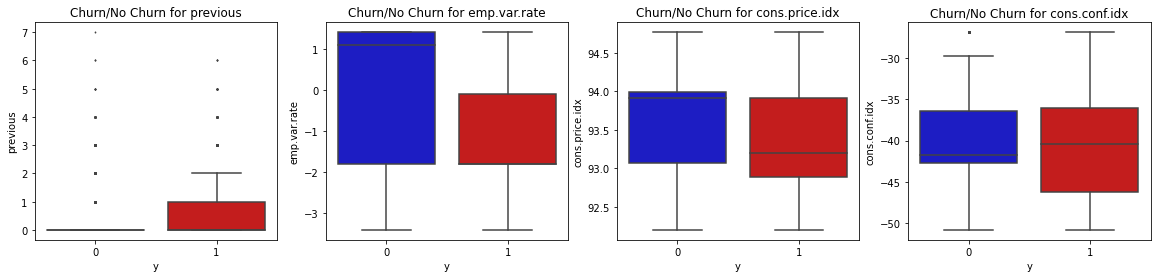

In [121]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="y", y="previous", data=df2, palette=colors, ax=axes[0], fliersize=1)
axes[0].set_title('Churn/No Churn for previous')

sns.boxplot(x="y", y="emp.var.rate", data=df2, palette=colors, ax=axes[1], fliersize=1)
axes[1].set_title('Churn/No Churn for emp.var.rate')


sns.boxplot(x="y", y="cons.price.idx", data=df2, palette=colors, ax=axes[2], fliersize=1)
axes[2].set_title('Churn/No Churn for cons.price.idx')


sns.boxplot(x="y", y="cons.conf.idx", data=df2, palette=colors, ax=axes[3], fliersize=1)
axes[3].set_title('Churn/No Churn for cons.conf.idx')

plt.show()

Pour les variables cons.price.idx et cons.conf.idx les distributions des variables dans le cas churn et non churn sont assez similaires.

Pour la variable previous, on voit que dans le cas churn, les valeurs prises par la variables sont beaucoup plus elevées que dans le cas de non churn, elle semble donc positivement corréllée avec la variable y.

Pour la variable emp.var.rate, on voit que dans le cas churn, les valeurs prises par la variables sont moins elevées que dans le cas de non churn, cette variable semble donc négativement corréllée avec la variable y.

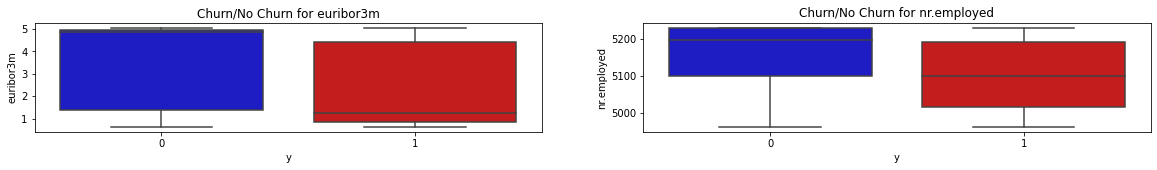

In [122]:
f, axes = plt.subplots(ncols=2, figsize=(20,2))

sns.boxplot(x="y", y="euribor3m", data=df2, palette=colors, ax=axes[0], fliersize=1)
axes[0].set_title('Churn/No Churn for euribor3m')

sns.boxplot(x="y", y="nr.employed", data=df2, palette=colors, ax=axes[1], fliersize=1)
axes[1].set_title('Churn/No Churn for nr.employed')

plt.show()

Pour ces 2 variables, on voit que dans le cas churn, les valeurs prises par la variables sont moins elevées que dans le cas de non churn : la  médiane est plus basse sur la boxplot de droite.
Donc les variables euribor3m et nr.employed semblent négativement corréllée avec la variable y.

D'apres les graphiques, les variables qui semblent correlées avec y sont les suivantes: duration, previous, emp.var.rate, euribor3m et nr.employed.

On a la matrice de corrélation des attributs :

In [64]:
df2.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


<Axes: >

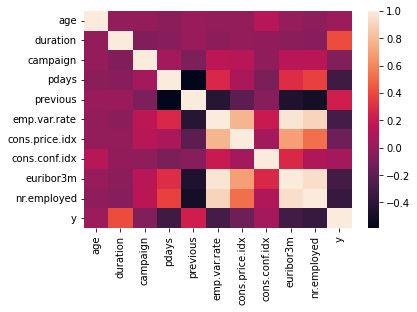

In [65]:
sns.heatmap(df2.corr())

Le heatmap permet de voir la corrélation entre les attributs. Par exemple, on voit que la variable previous est tres corrélée avec les variables pdays, emp.var.rate, euribor3m et nr.employed. De même on remarque que emp.var.rate est très corrélée avec euribor3m et nr.employed, et que euribor3m et nr.employed sont très corrélées entre elles.

De plus on peut voir la correlation de chaque attribut avec la variable churn y. On remarque que pdays, emp.var.rate, cons.price.idx, euribor3m et nr.employed semblent négativement corrélées. De même on voit que duration et previous semblent positivement corrélées

Conclusion:

Les attributs qui semblent être fortement liés au
comportement de churn sont donc : pdays, emp.var.rate, cons.price.idx, euribor3m, nr.employed, duration et previous

## Dataset Employee Attrition

In [52]:
df3 = pd.read_csv('whole data.csv')
df3

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,3,3,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,4409,2,3,4.0,1.0,3.0,42,No,Travel_Rarely,Sales,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [53]:
df3.shape

(4410, 29)

Ce dataset contient 4410 lignes et 29 colones

In [54]:
df3.isnull().sum()

EmployeeID                  0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Il y a peu de valeurs manquantes par rapport au nombre de lignes totales donc on peut supprimer les lignes avec des valeurs manquantes sans probleme

In [55]:
df3 = df3.dropna()
df3.isnull().sum()

EmployeeID                 0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [56]:
df3.describe()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,EmployeeCount,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.0,...,4300.000000,4300.000000,4300.000000,4300.0,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,2211.695116,2.728837,3.153953,2.723953,2.724884,2.761163,36.926977,9.197907,2.913256,1.0,...,65059.844186,2.690000,15.210698,8.0,0.795349,11.285116,2.796279,7.026047,2.190000,4.132558
std,1272.117692,0.710769,0.360946,1.093802,1.101875,0.707800,9.146517,8.097059,1.024774,0.0,...,47045.398914,2.495764,3.662777,0.0,0.853534,7.790052,1.290142,6.148036,3.230818,3.565831
min,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.0,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1110.750000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,1.0,...,29260.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,2215.500000,3.000000,3.000000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,1.0,...,49360.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,3314.250000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,1.0,...,83802.500000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.250000,3.000000,7.000000
max,4409.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,1.0,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


Il y a 3 attributs constants EmployeeCount, Over18 and StandardHours, donc on peut supprimer ces colones

In [57]:
df3 = df3.drop(columns=["EmployeeCount", "Over18", "StandardHours"])
df3

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,...,Married,131160,1.0,11,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,...,Single,41890,0.0,23,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,...,Married,193280,1.0,15,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,...,Married,83210,3.0,11,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,...,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,2,3,3.0,4.0,3.0,29,No,Travel_Rarely,Sales,...,Single,35390,1.0,18,0,6.0,2,6,1,5
4405,4406,3,3,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,...,Single,60290,3.0,17,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,...,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,...,Married,37020,0.0,20,0,5.0,4,4,1,2


In [58]:
df3.shape

(4300, 26)

La variable churn a laquelle on s'interesse est Attrition, c'est une variable categorielle qu'on transforme en 0 ou 1 

In [59]:
df3['Attrition'] = df3['Attrition'].replace(['No', 'Yes'], [0, 1])

df3

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,...,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3,3,3.0,4.0,2.0,51,0,Travel_Rarely,Sales,...,Married,131160,1.0,11,0,1.0,6,1,0,0
1,2,2,4,3.0,2.0,4.0,31,1,Travel_Frequently,Research & Development,...,Single,41890,0.0,23,1,6.0,3,5,1,4
2,3,3,3,2.0,2.0,1.0,32,0,Travel_Frequently,Research & Development,...,Married,193280,1.0,15,3,5.0,2,5,0,3
3,4,2,3,4.0,4.0,3.0,38,0,Non-Travel,Research & Development,...,Married,83210,3.0,11,3,13.0,5,8,7,5
4,5,3,3,4.0,1.0,3.0,32,0,Travel_Rarely,Research & Development,...,Single,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,2,3,3.0,4.0,3.0,29,0,Travel_Rarely,Sales,...,Single,35390,1.0,18,0,6.0,2,6,1,5
4405,4406,3,3,4.0,1.0,3.0,42,0,Travel_Rarely,Research & Development,...,Single,60290,3.0,17,1,10.0,5,3,0,2
4406,4407,2,3,4.0,4.0,3.0,29,0,Travel_Rarely,Research & Development,...,Divorced,26790,2.0,15,0,10.0,2,3,0,2
4407,4408,3,4,1.0,3.0,3.0,25,0,Travel_Rarely,Research & Development,...,Married,37020,0.0,20,0,5.0,4,4,1,2


In [60]:
print('Not Churn', round(df3['Attrition'].value_counts()[0]/len(df3) * 100,2), '% of the dataset')
print('Churn', round(df3['Attrition'].value_counts()[1]/len(df3) * 100,2), '% of the dataset')

Not Churn 83.84 % of the dataset
Churn 16.16 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: Not Churn || 1: Churn)')

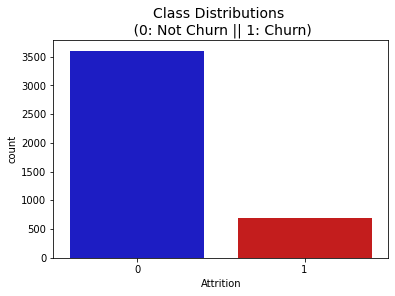

In [61]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x=df3["Attrition"], palette=colors)
plt.title('Class Distributions \n (0: Not Churn || 1: Churn)', fontsize=14)

On voit que la majorite des individus ne churn pas

On regarde maintenant la proportion de churn vs. non churn pour les variables categorielles

<Axes: xlabel='BusinessTravel', ylabel='count'>

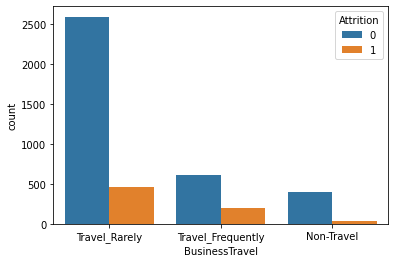

In [123]:
sns.countplot(data=df3, x="BusinessTravel", hue="Attrition")


<Axes: xlabel='Department', ylabel='count'>

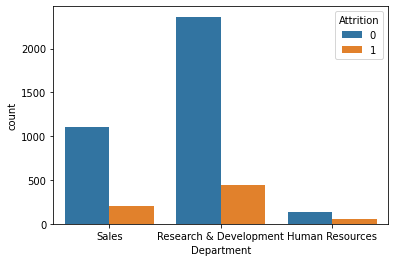

In [124]:
sns.countplot(data=df3, x="Department", hue="Attrition")

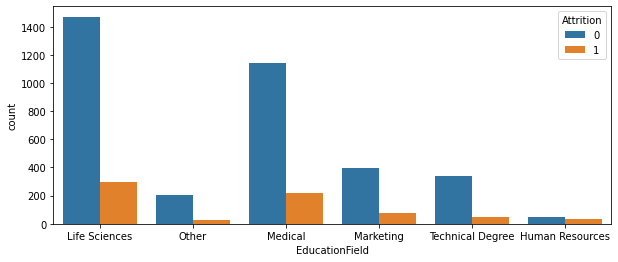

In [127]:
plt.figure(figsize=(10,4))
sns.countplot(data=df3, x="EducationField", hue="Attrition")
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

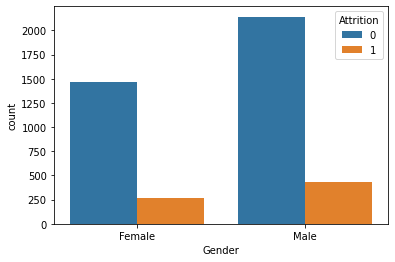

In [128]:
sns.countplot(data=df3, x="Gender", hue="Attrition")

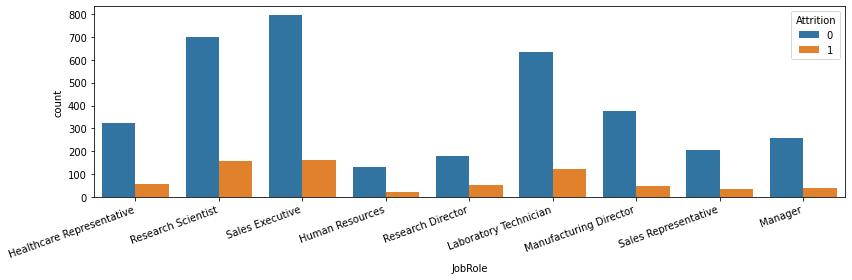

In [134]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data=df3, x="JobRole", hue="Attrition")

ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.tight_layout()
plt.show()

<Axes: xlabel='MaritalStatus', ylabel='count'>

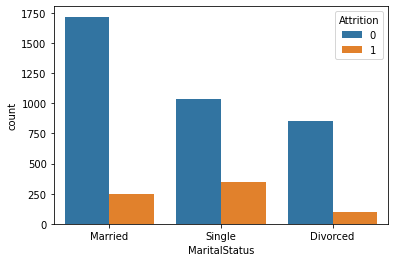

In [135]:
sns.countplot(data=df3, x="MaritalStatus", hue="Attrition")

On regarde maintenant la proportion de churn vs. non churn pour les variables numeriques

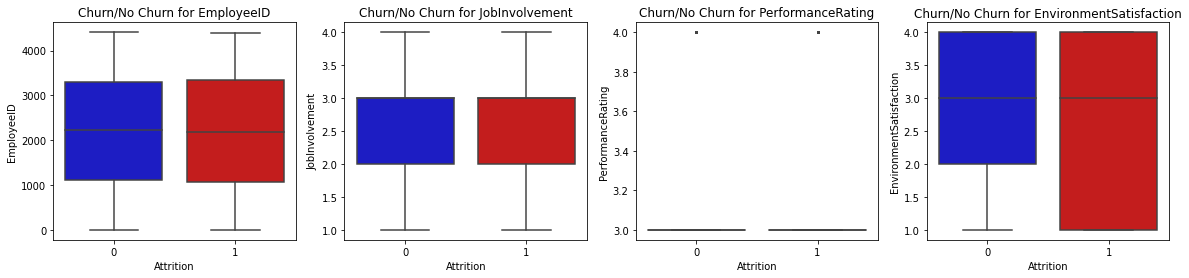

In [137]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Attrition", y="EmployeeID", data=df3, palette=colors, ax=axes[0], fliersize=1)
axes[0].set_title('Churn/No Churn for EmployeeID')

sns.boxplot(x="Attrition", y="JobInvolvement", data=df3, palette=colors, ax=axes[1], fliersize=1)
axes[1].set_title('Churn/No Churn for JobInvolvement')


sns.boxplot(x="Attrition", y="PerformanceRating", data=df3, palette=colors, ax=axes[2], fliersize=1)
axes[2].set_title('Churn/No Churn for PerformanceRating')


sns.boxplot(x="Attrition", y="EnvironmentSatisfaction", data=df3, palette=colors, ax=axes[3], fliersize=1)
axes[3].set_title('Churn/No Churn for EnvironmentSatisfaction')

plt.show()

Pour les variables EmployeeID, JobInvolvement et PerformanceRating les distributions des variables dans le cas churn et non churn sont très similaires.

Pour la variable EnvironmentSatifaction, on voit que dans le cas churn, les valeurs prises par la variables sont moins elevées que dans le cas de non churn (même si les médianes sont égales), donc cette variable semble négativement corréllée avec la variable Attrition.

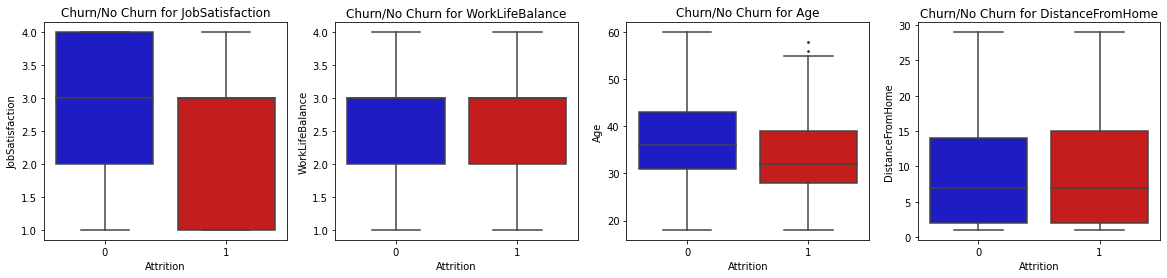

In [138]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Attrition", y="JobSatisfaction", data=df3, palette=colors, ax=axes[0], fliersize=1)
axes[0].set_title('Churn/No Churn for JobSatisfaction')

sns.boxplot(x="Attrition", y="WorkLifeBalance", data=df3, palette=colors, ax=axes[1], fliersize=1)
axes[1].set_title('Churn/No Churn for WorkLifeBalance')


sns.boxplot(x="Attrition", y="Age", data=df3, palette=colors, ax=axes[2], fliersize=1)
axes[2].set_title('Churn/No Churn for Age')


sns.boxplot(x="Attrition", y="DistanceFromHome", data=df3, palette=colors, ax=axes[3], fliersize=1)
axes[3].set_title('Churn/No Churn for DistanceFromHome')

plt.show()

Pour les variables WorkLifeBalance et DistanceFormHome les distributions des variables dans le cas churn et non churn sont très similaires.

Pour les variables JobSatifaction et Age, on voit que dans le cas churn, les valeurs prises par les variables sont moins elevées que dans le cas de non churn. Elles semblent donc négativement corréllées avec la variable Attrition.

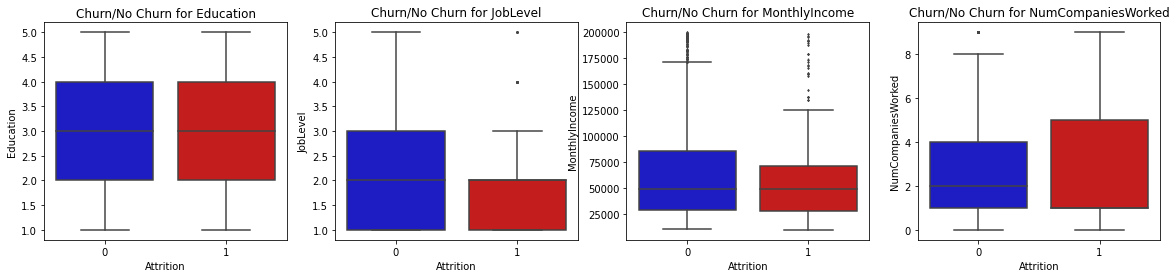

In [139]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Attrition", y="Education", data=df3, palette=colors, ax=axes[0], fliersize=1)
axes[0].set_title('Churn/No Churn for Education')

sns.boxplot(x="Attrition", y="JobLevel", data=df3, palette=colors, ax=axes[1], fliersize=1)
axes[1].set_title('Churn/No Churn for JobLevel')


sns.boxplot(x="Attrition", y="MonthlyIncome", data=df3, palette=colors, ax=axes[2], fliersize=1)
axes[2].set_title('Churn/No Churn for MonthlyIncome')


sns.boxplot(x="Attrition", y="NumCompaniesWorked", data=df3, palette=colors, ax=axes[3], fliersize=1)
axes[3].set_title('Churn/No Churn for NumCompaniesWorked')

plt.show()

Pour la variable Education la distribution dans le cas churn et non churn est très similaires.

Pour les variables Joblevel et MonthlyIncome, on voit que dans le cas churn, les valeurs prises par la variables sont moins elevées que dans le cas de non churn. Donc ces variables semblent négativement corréllée avec la variable Attrition.

A l'inverse, la variable NumCompaniesWorked semble positivement corrélée avec la variable Attrition

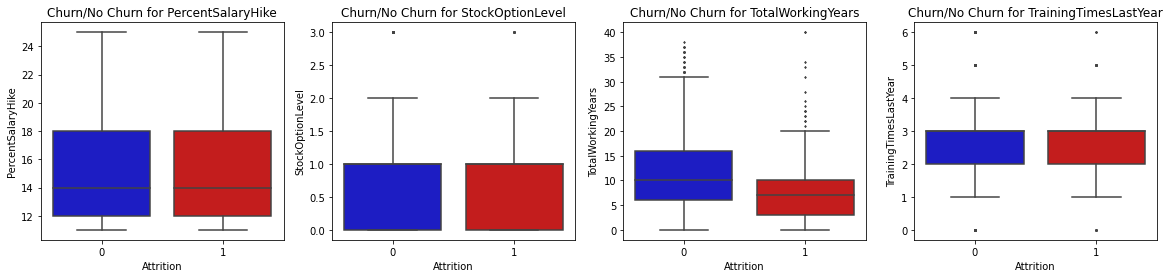

In [140]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Attrition", y="PercentSalaryHike", data=df3, palette=colors, ax=axes[0], fliersize=1)
axes[0].set_title('Churn/No Churn for PercentSalaryHike')

sns.boxplot(x="Attrition", y="StockOptionLevel", data=df3, palette=colors, ax=axes[1], fliersize=1)
axes[1].set_title('Churn/No Churn for StockOptionLevel')


sns.boxplot(x="Attrition", y="TotalWorkingYears", data=df3, palette=colors, ax=axes[2], fliersize=1)
axes[2].set_title('Churn/No Churn for TotalWorkingYears')


sns.boxplot(x="Attrition", y="TrainingTimesLastYear", data=df3, palette=colors, ax=axes[3], fliersize=1)
axes[3].set_title('Churn/No Churn for TrainingTimesLastYear')

plt.show()

Pour les variables PercentSalaryHike, StockOptionLevel et TrainingTimeslastYear les distributions dans le cas churn et non churn sont très similaires (même médiane et min/max).

La variable TotalWorkingYears semble négativement corrélée avec la variable Attrition, car elle prend des valeurs moins élevées dans le cas churn.

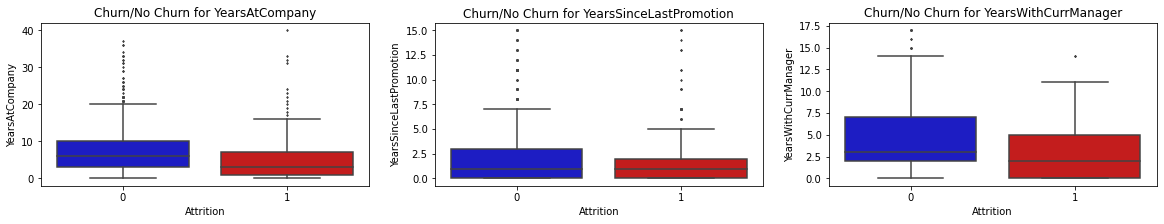

In [141]:
f, axes = plt.subplots(ncols=3, figsize=(20,3))

sns.boxplot(x="Attrition", y="YearsAtCompany", data=df3, palette=colors, ax=axes[0], fliersize=1)
axes[0].set_title('Churn/No Churn for YearsAtCompany')

sns.boxplot(x="Attrition", y="YearsSinceLastPromotion", data=df3, palette=colors, ax=axes[1], fliersize=1)
axes[1].set_title('Churn/No Churn for YearsSinceLastPromotion')


sns.boxplot(x="Attrition", y="YearsWithCurrManager", data=df3, palette=colors, ax=axes[2], fliersize=1)
axes[2].set_title('Churn/No Churn for YearsWithCurrManager')

plt.show()

Ces variables semblent négativement corrélées avec la variable Attrition, elles prennent des valeurs moins elevées dans le cas churn.

D'apres les graphiques, les attributs qui semblent corrélées avec la variable Attrition sont les suivantes: EnvironmentSatifaction, JobSatifaction, Age,
Joblevel, MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion et YearsWithCurrManager.

On a la matrice de correlation des attributs :

In [62]:
df3.corr()

,EmployeeID,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,1.000000,0.010275,-0.008336,0.002042,0.000165,-0.005785,0.003651,-0.001707,0.003851,-0.012041,-0.002695,0.009136,-0.000349,-0.004508,-0.012503,-0.003896,-0.010225,0.000087,0.002201,0.005617
JobInvolvement,0.010275,1.000000,0.012249,0.015897,0.003034,-0.017332,0.021284,-0.014705,-0.007972,-0.020804,-0.015054,0.028555,0.026559,-0.003603,0.009347,0.004724,-0.013835,0.010027,0.027911,-0.001600
PerformanceRating,-0.008336,0.012249,1.000000,0.011043,0.047449,-0.023573,-0.025059,0.026262,0.035974,-0.035579,-0.001362,0.021096,0.018649,0.773902,-0.037390,-0.002544,-0.020549,-0.008726,-0.018307,-0.006642
EnvironmentSatisfaction,0.002042,0.015897,0.011043,1.000000,-0.003197,0.023286,0.007983,-0.103485,0.018882,-0.044403,-0.023156,-0.005380,0.012443,-0.003072,-0.005711,-0.003919,0.018327,0.003214,0.015635,-0.004572
JobSatisfaction,0.000165,0.003034,0.047449,-0.003197,1.000000,-0.019251,0.000868,-0.103098,-0.011494,-0.005895,-0.018841,0.003420,-0.059525,0.036671,0.038806,-0.013379,-0.023072,-0.001414,-0.017723,-0.025942
WorkLifeBalance,-0.005785,-0.017332,-0.023573,0.023286,-0.019251,1.000000,-0.024756,-0.059817,0.009345,-0.005480,-0.022040,0.003702,-0.008871,-0.040252,-0.022785,-0.000430,-0.016614,0.013778,0.007235,0.005266
Age,0.003651,0.021284,-0.025059,0.007983,0.000868,-0.024756,1.000000,-0.155584,0.004621,-0.034452,-0.000781,-0.047256,0.303709,-0.034313,-0.030608,0.681213,-0.032032,0.314384,0.216554,0.204117
Attrition,-0.001707,-0.014705,0.026262,-0.103485,-0.103098,-0.059817,-0.155584,1.000000,-0.008314,-0.015237,-0.014587,-0.032629,0.043911,0.034425,-0.007971,-0.168637,-0.046239,-0.133612,-0.029931,-0.155420
DistanceFromHome,0.003851,-0.007972,0.035974,0.018882,-0.011494,0.009345,0.004621,-0.008314,1.000000,-0.006369,-0.038576,-0.019798,-0.016336,0.035857,0.007376,0.004364,-0.006383,0.030998,0.001888,0.020876
Education,-0.012041,-0.020804,-0.035579,-0.044403,-0.005895,-0.005480,-0.034452,-0.015237,-0.006369,1.000000,0.043686,0.006381,-0.018156,-0.043592,0.000443,-0.008236,0.009327,0.008297,0.026970,0.007476


<Axes: >

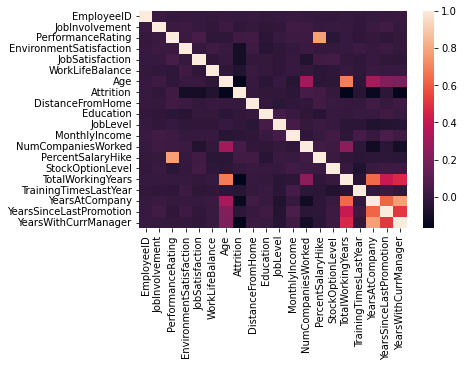

In [63]:
sns.heatmap(df3.corr())

Le heatmap nous montre qu'il y a une corrélation forte entre certains attributs:  on voit que les variables TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion et YearsWithCurrManager sont tres corrélées entre elles.
De même, les variables PerformanceRating et PercentSalaryHike sont corrélées. Par ailleurs, la variable Age est aussi corrélée avec les attributs NumCompaniesWorked, TotalWorkingYears,  YearsAtCompany, YearsSinceLastPromotion et YearsWithCurrManager. 

On s'interesse maintenant à la correlation de chaque attribut avec la variable churn Attrition. On remarque qu'elle est le plus négativement corrélée avec les variables :
Age, TotalWorkingYears, YearsAtCompany, YearsWithCurrManager et EnvironmentSatifaction.


Conclusion : 

Les attributs qui semblent être fortement liés au comportement de churn sont donc : Age, TotalWorkingYears, YearsAtCompany, YearsWithCurrManager et EnvironmentSatifaction.